# importing modules 

In [3]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')


In [63]:
!pip install librosa

# load the dataset

In [11]:
paths=[]
labels=[]
for dirname, _,filenames in os.walk("C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        #print(filename)
        label = filename.split('_')[-1]
        #print(label)
        label=label.split('.')[0]
        labels.append(label.lower())
        
print('dataset is loaded')

dataset is loaded


In [12]:
paths[:5]

['C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/nitin/Documents/nlp project/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [13]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [15]:
#creating the data frame 
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,C:/Users/nitin/Documents/nlp project/archive/T...,angry
1,C:/Users/nitin/Documents/nlp project/archive/T...,angry
2,C:/Users/nitin/Documents/nlp project/archive/T...,angry
3,C:/Users/nitin/Documents/nlp project/archive/T...,angry
4,C:/Users/nitin/Documents/nlp project/archive/T...,angry


In [16]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

# EDA

<AxesSubplot:xlabel='label', ylabel='count'>

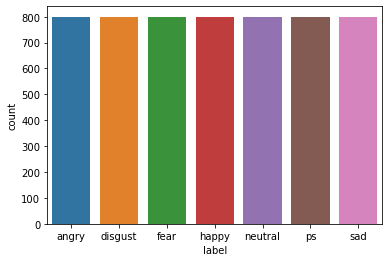

In [17]:
sns.countplot(df['label'])

In [25]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

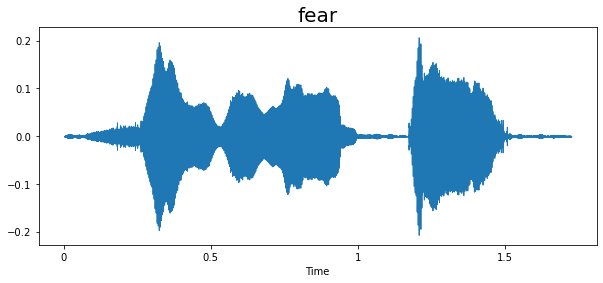

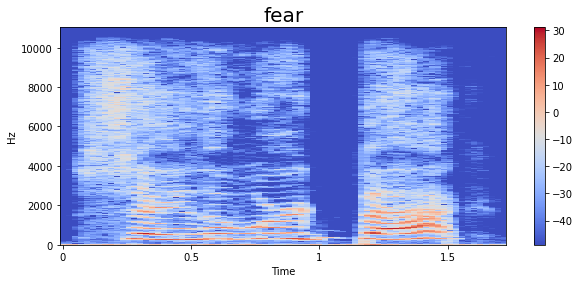

In [27]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


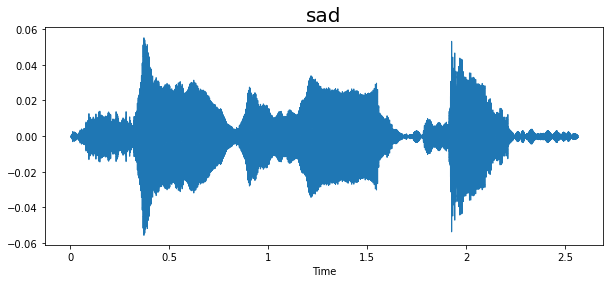

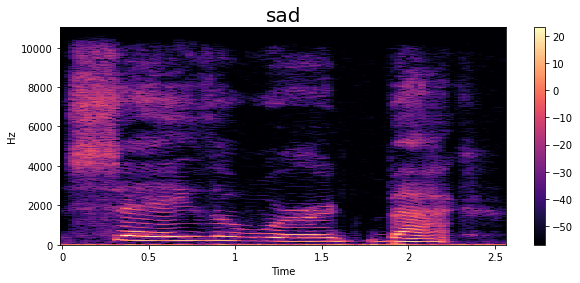

In [28]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


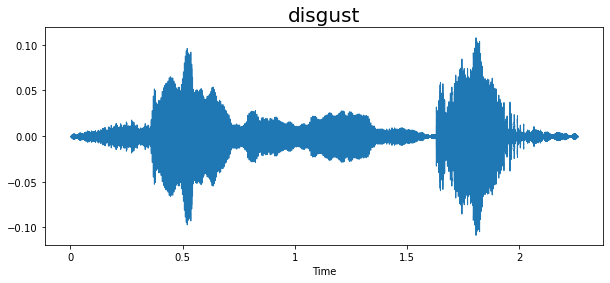

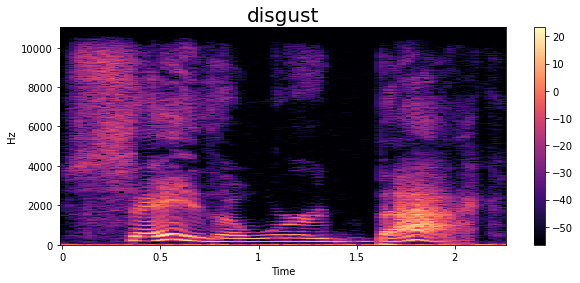

In [29]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


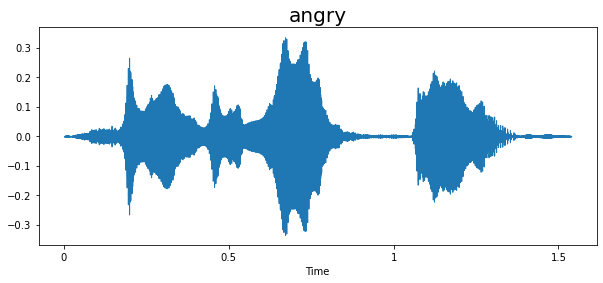

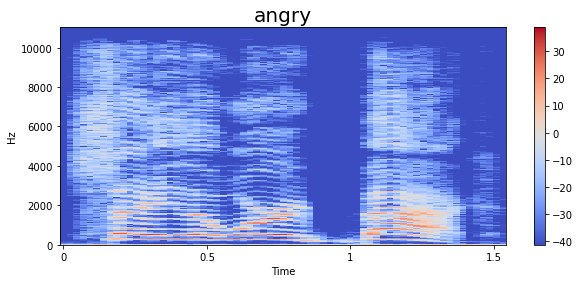

In [30]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


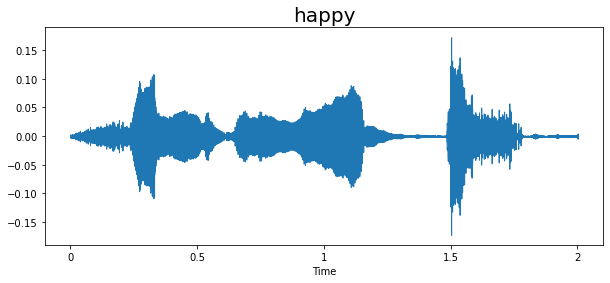

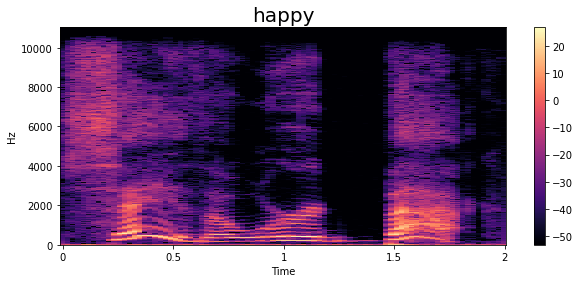

In [31]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


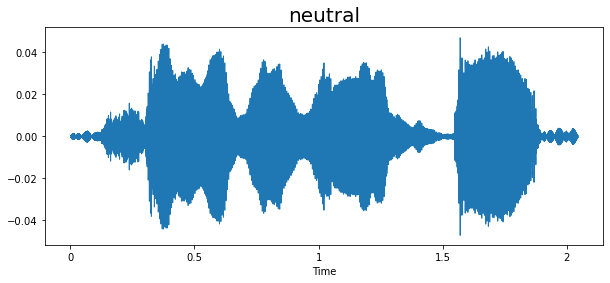

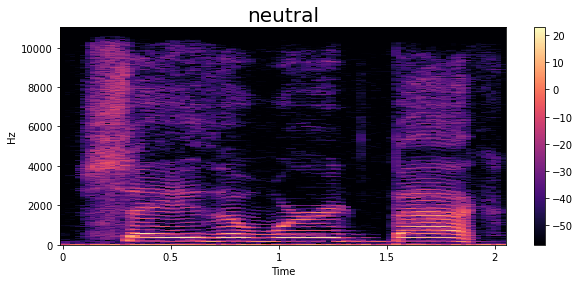

In [32]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


# feature extraction

In [33]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [34]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622475e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149229e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929298e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038864e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294439e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [35]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [37]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234, 0.18...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873596, 18.061928, 6.0...
                              ...                        
5595    [-408.0878, 82.66084, 30.182566, 48.84698, -3....
5596    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
5597    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
5598    [-436.16336, 91.74894, 26.539776, 41.395664, -...
5599    [-423.6657, 73.28961, 29.890434, 48.220123, 2....
Name: speech, Length: 5600, dtype: object

In [49]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [50]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [59]:
y = y.toarray()

In [60]:
y.shape

(5600, 7)

In [61]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# creating lstm model

In [67]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [68]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 13s 160ms/step - loss: 0.9178 - accuracy: 0.6583 - val_loss: 0.4962 - val_accuracy: 0.8098
Epoch 2/50
70/70 [==============================] - 11s 164ms/step - loss: 0.2883 - accuracy: 0.9058 - val_loss: 0.2871 - val_accuracy: 0.9027
Epoch 3/50
70/70 [==============================] - 14s 204ms/step - loss: 0.1909 - accuracy: 0.9413 - val_loss: 0.0721 - val_accuracy: 0.9786
Epoch 4/50
70/70 [==============================] - 16s 223ms/step - loss: 0.1217 - accuracy: 0.9621 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 5/50
70/70 [==============================] - 15s 216ms/step - loss: 0.0947 - accuracy: 0.9730 - val_loss: 0.0280 - val_accuracy: 0.9929
Epoch 6/50
70/70 [==============================] - 15s 211ms/step - loss: 0.0781 - accuracy: 0.9770 - val_loss: 0.0615 - val_accuracy: 0.9830
Epoch 7/50
70/70 [==============================] - 15s 210ms/step - loss: 0.0958 - accuracy: 0.9705 - val_loss: 0.0212 - val_accuracy: 0.9929

# plot the result

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()